# Usage

python>=3.7対応、本書ではpython3.8で動作確認をしている
```bash
# Ubuntuでの環境用意の例
$ sudo apt-get install python3.8 jupyter-notebook
$ python3.8 -m pip install --upgrade pip setuptools
$ python3.8 -m pip install numpy==1.19.5 scipy==1.4.1 matplotlib==3.2.2 jupyter
$ python3.8 -m jupyter notebook
```


In [1]:
import scipy.stats 
import numpy as np
import matplotlib.pyplot as plt
import itertools
from dataclasses import dataclass

In [2]:
import scipy
scipy.__version__

'1.4.1'

In [3]:
np.__version__

'1.19.5'

In [4]:
import matplotlib
matplotlib.__version__

'3.2.2'

# 2. 等分散の仮定
- 何はともあれWelchのt検定を使うべき

## 2.2 不等分散がstudentのt検定に与える影響のシミュレーション

In [5]:

# 各群が等分散 / 独立同分布 / 群の平均値の分布が正規分布, 各種の仮定が満たされている
# 帰無仮説のもとで、p < 0.05の検定での偽陽性率を見る
# p値の定義から、有意水準 p < X の時の偽陽性率はXに一致するはず

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=5, scale=1, size=10), 
      equal_var=True
      ).pvalue
  for _ in range(100000)
  ]

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))


偽陽性率:  0.04961


In [6]:

# 等分散の仮定を外してstudentのt検定をしてしまった場合
# p<0.05の偽陽性率

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=5, scale=100, size=10), 
      equal_var=True
      ).pvalue
  for _ in range(100000)
  ]

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))


偽陽性率:  0.06412


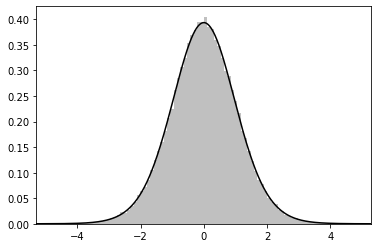

In [7]:

# 各種の仮定が満たされている
# 帰無仮説のもとでのt統計量

np.random.seed(0)


test_results = [
  scipy.stats.ttest_ind(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=5, scale=1, size=10), 
      equal_var=True
      ).statistic
  for _ in range(100000)
  ]

test_stat_mean = np.mean(test_results)
test_stat_std = np.std(test_results)
X_min = test_stat_mean - test_stat_std * 5
X_max = test_stat_mean + test_stat_std * 5

plt.hist(test_results, bins=100, range=(X_min, X_max), density=True, color="silver")

X = np.arange(X_min, X_max, 0.001)
Y = scipy.stats.t.pdf(X, df=(10+10-2))
plt.plot(X, Y, color="black")

plt.xlim([X_min, X_max])
plt.show()


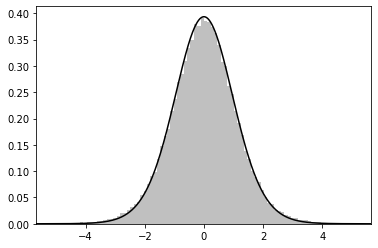

In [8]:

# 等分散の仮定を外してstudentのt検定をしてしまった場合
# 帰無仮説のもとでのt統計量

np.random.seed(0)


test_results = [
  scipy.stats.ttest_ind(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=5, scale=100, size=10), 
      equal_var=True
      ).statistic
  for _ in range(100000)
  ]

test_stat_mean = np.mean(test_results)
test_stat_std = np.std(test_results)
X_min = test_stat_mean - test_stat_std * 5
X_max = test_stat_mean + test_stat_std * 5

plt.hist(test_results, bins=100, range=(X_min, X_max), density=True, color="silver")

X = np.arange(X_min, X_max, 0.001)
Y = scipy.stats.t.pdf(X, df=(10+10-2))
plt.plot(X, Y, color="black")

plt.xlim([X_min, X_max])
plt.show()


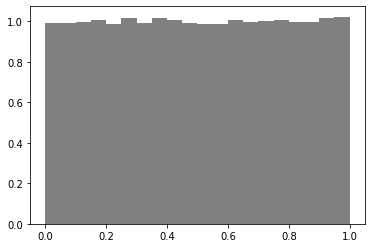

In [9]:
# p値の分布で分析する
# p値の定義から、帰無仮説のもとでサンプリングを行った場合、p値は一様分布になるはず
# 各種仮定が満たされている場合

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=5, scale=1, size=10), 
      equal_var=True
      ).pvalue
  for _ in range(100000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()


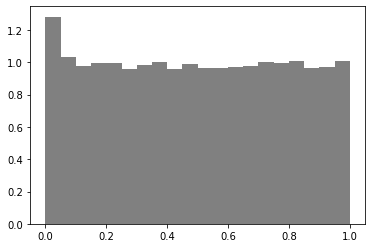

In [10]:
# 等分散性の仮定が満たされない場合
# p値の分布

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=5, scale=100, size=10), 
      equal_var=True
      ).pvalue
  for _ in range(100000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()


## 2.3 不等分散でも適用可能なWelchのt検定

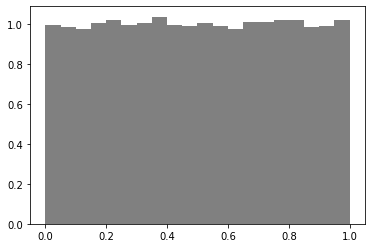

偽陽性率:  0.04973


In [11]:

# Welchのt検定を用いることで不等分散を補正する

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=5, scale=100, size=10), 
      equal_var=False
      ).pvalue
  for _ in range(100000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))

## 2.5 Q. 等分散の状況でWelchではなくstudentのt検定を使うメリットはあるか？

In [12]:

# Welchがstudentに比べて汎用性が高い代わりに、より厳しい仮定を置くstudentのt検定は検出力が高い？
# studentのt検定

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=4, scale=1, size=10),
      equal_var=True
      ).pvalue
  for _ in range(100000)
  ]

print("検出力", len([t for t in test_results if t < 0.05]) / len(test_results))


検出力 0.56197


In [13]:

# Welchのt検定の検出力

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=4, scale=1, size=10),
      equal_var=False
      ).pvalue
  for _ in range(100000)
  ]

print("検出力", len([t for t in test_results if t < 0.05]) / len(test_results))


検出力 0.55645


# 3. 平均値が正規分布に近似できない場合

- パラメトリックブートストラップ検定とノンパラメトリックな検定、どちらも一長一短

## 3.2 中心極限定理の適用に必要なサンプルサイズ

In [14]:
# 対数正規分布の平均値の分布可視化
# サンプル数がどの程度集まれば中心極限定理が適用できるか？

def lognormal_avg_hist(mean, sigma, size):
  np.random.seed(seed=0)
  
  lognormal_avgs = [np.mean(np.random.lognormal(mean=mean, sigma=sigma, size=size)) for _ in range(10000)]
  
  lognormal_avgs_mean = np.mean(lognormal_avgs)
  lognormal_avgs_std = np.std(lognormal_avgs)
  X_min = lognormal_avgs_mean - lognormal_avgs_std * 5
  X_max = lognormal_avgs_mean + lognormal_avgs_std * 5

  plt.hist(lognormal_avgs, bins=100, range=(X_min, X_max), density=True, color="silver")

  X = np.arange(X_min, X_max, 0.001)
  Y = scipy.stats.norm.pdf(X, lognormal_avgs_mean, lognormal_avgs_std)
  plt.plot(X, Y, color="black")
  
  plt.title(f"n={size}")
  plt.show()



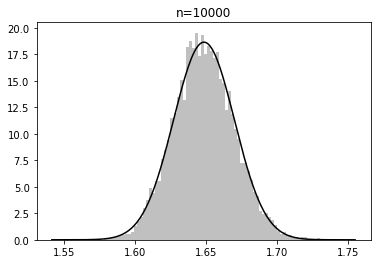

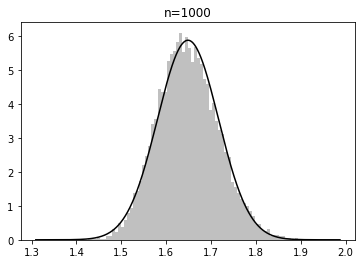

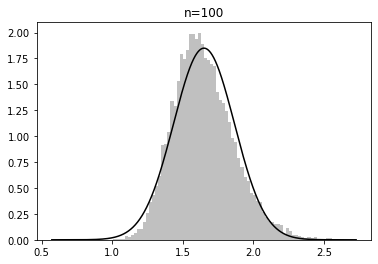

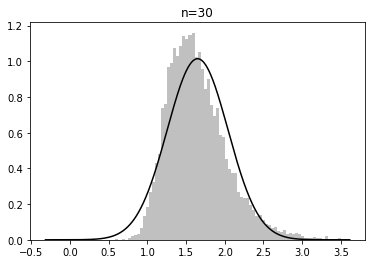

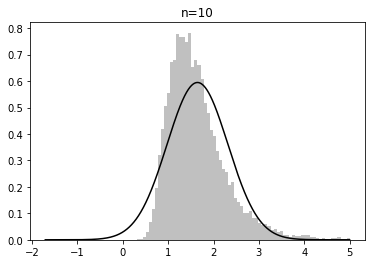

In [15]:
# 標準正規分布をexpに入れたときの対数正規分布の平均値の分布

lognormal_avg_hist(0, 1, 10000)
lognormal_avg_hist(0, 1, 1000)
lognormal_avg_hist(0, 1, 100)
lognormal_avg_hist(0, 1, 30)
lognormal_avg_hist(0, 1, 10)

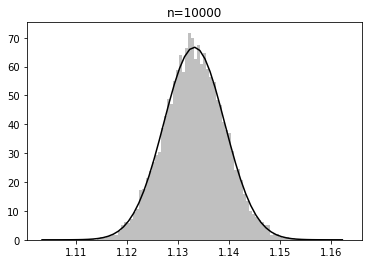

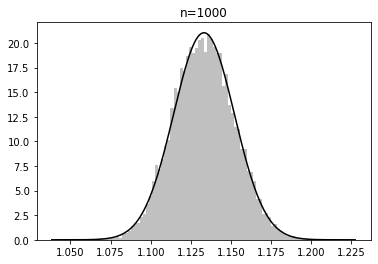

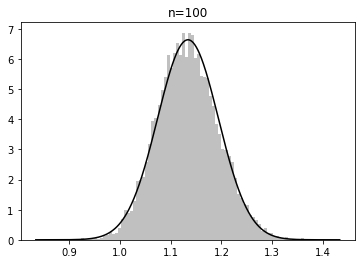

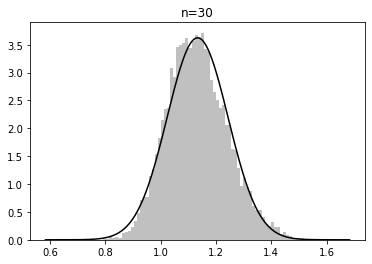

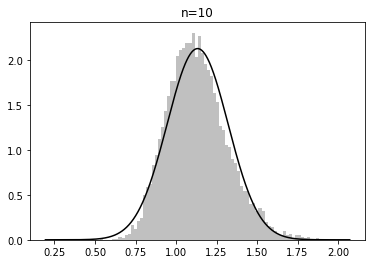

In [16]:
# サンプリング元の正規分布の分散を半分にすると

lognormal_avg_hist(0, 0.5, 10000)
lognormal_avg_hist(0, 0.5, 1000)
lognormal_avg_hist(0, 0.5, 100)
lognormal_avg_hist(0, 0.5, 30)
lognormal_avg_hist(0, 0.5, 10)

## 3.3 正規性が満たされないサンプルでt検定を行うと

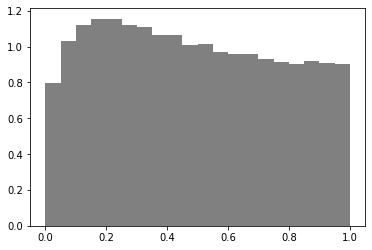

偽陽性率:  0.03993


In [17]:
# 正規性の仮定が満たされないときのp値の分布
# p≒0.3あたりにピークが来る、外れ値に影響されやすいサンプルでよく見るパターン


np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
        np.random.lognormal(mean=0, sigma=1, size=30), 
        np.random.lognormal(mean=0, sigma=1, size=30), 
        equal_var=False
      ).pvalue
  for _ in range(100000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  

## 3.4 パラメトリックブートストラップ検定

In [18]:

# パラメトリックブートストラップ

def lognormal_bootstrap_sampling_mean(samples, bootstrap_sample_size):
  mean = np.mean(np.log(samples))
  sigma = np.std(np.log(samples), ddof=1)
  n = len(samples)
  return np.array([np.mean(np.random.lognormal(mean=mean, sigma=sigma, size=n)) 
                   for _ in range(bootstrap_sample_size)])


def lognormal_bootstrap_test(samples_a, samples_b, bootstrap_sample_size=2000):
  bootstrap_mean_a = lognormal_bootstrap_sampling_mean(samples_a, bootstrap_sample_size)
  bootstrap_mean_b = lognormal_bootstrap_sampling_mean(samples_b, bootstrap_sample_size)
  bootstrap_deltas = bootstrap_mean_b - bootstrap_mean_a
  bootstrap_deltas_win = len([d for d in bootstrap_deltas if d>0])
  bootstrap_deltas_lose = len([d for d in bootstrap_deltas if d<0])
  # bootstrapの勝率は片側検定にあたる
  # そのため両側検定でのp値は頻度が小さい側の割合*2となる
  p_value = min(bootstrap_deltas_win, bootstrap_deltas_lose) / (bootstrap_deltas_win + bootstrap_deltas_lose) * 2
  return p_value



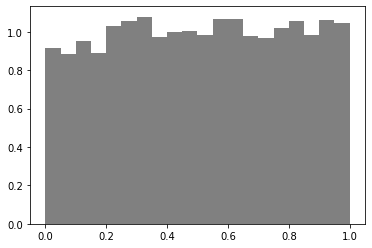

偽陽性率:  0.0457
CPU times: user 6min 20s, sys: 125 ms, total: 6min 20s
Wall time: 6min 23s


In [19]:
%%time

#  パラメトリックブートストラップ検定の帰無仮説におけるp値の分布

np.random.seed(seed=0)


test_results = [
  lognormal_bootstrap_test(
        np.random.lognormal(mean=0, sigma=1, size=30), 
        np.random.lognormal(mean=0, sigma=1, size=30), 
      )
  for _ in range(10000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  


In [20]:
%%time

# パラメトリックブートストラップ検定の検出力

np.random.seed(seed=0)


test_results = [
  lognormal_bootstrap_test(
        np.random.lognormal(mean=0, sigma=1, size=30), 
        np.random.lognormal(mean=0.5, sigma=1, size=30), 
      )
  for _ in range(10000)
  ]

print("検出力: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  


検出力:  0.3362
CPU times: user 6min 27s, sys: 203 ms, total: 6min 27s
Wall time: 6min 30s


In [21]:

# 対数正規分布のパラメトリックブートストラップ検定の検出力がt検定と比較してどうなのか
# 厳密には検定しているものが違うため、対等な比較ではない

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
        np.random.normal(loc=0, scale=1, size=30), 
        np.random.normal(loc=0.5, scale=1, size=30), 
      ).pvalue
  for _ in range(10000)
  ]

print("検出力: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  


検出力:  0.4795


## 3.7 マンホイットニーのU検定

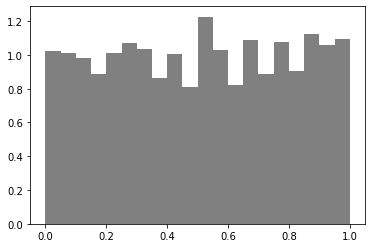

偽陽性率:  0.0512


In [22]:

# ノンパラメトリック検定のひとつ、U検定によって中央値検定を行う

np.random.seed(seed=0)


test_results = [
  scipy.stats.mannwhitneyu(
        np.random.lognormal(mean=0, sigma=1, size=30), 
        np.random.lognormal(mean=0, sigma=1, size=30), 
      ).pvalue * 2    # mannwhitneyuのp値は片側検定の値なので、両側検定にするためにp値を2倍にする
  for _ in range(10000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  

In [23]:
# U検定の検出力

np.random.seed(seed=0)


test_results = [
  scipy.stats.mannwhitneyu(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=4, scale=1, size=10),
      ).pvalue * 2
  for _ in range(10000)
  ]

print("検出力", len([t for t in test_results if t < 0.05]) / len(test_results))


検出力 0.5189


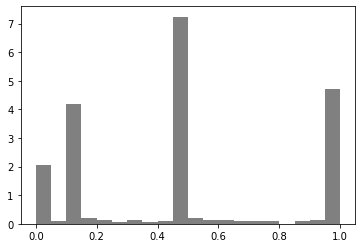

偽陽性率:  0.1036


In [24]:

# U検定も等分散性の仮定が必要で、それが満たされなかった時の影響はstudentのt検定よりもずっと大きい
# こちらも参照
# https://www.jstage.jst.go.jp/article/psj/advpub/0/advpub_30.006/_pdfs

np.random.seed(seed=0)


test_results = [
  scipy.stats.mannwhitneyu(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=5, scale=100, size=10), 
      ).pvalue * 2
  for _ in range(10000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  

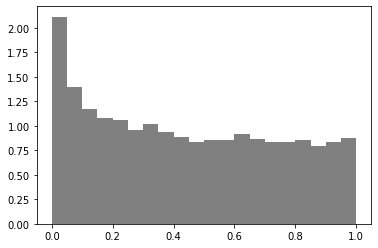

偽陽性率:  0.1057


In [25]:

# サンプル数が多くても不等分散におけるp値の分布は歪む

np.random.seed(seed=0)


test_results = [
  scipy.stats.mannwhitneyu(
      np.random.normal(loc=5, scale=1, size=1000), 
      np.random.normal(loc=5, scale=100, size=1000), 
      ).pvalue * 2
  for _ in range(10000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  

## 3.8 Brunner-Munzel検定

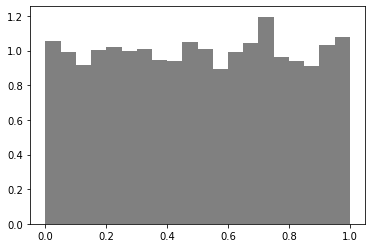

偽陽性率:  0.0529
CPU times: user 3.36 s, sys: 15.6 ms, total: 3.38 s
Wall time: 3.36 s


In [26]:
%%time
# Brunner-Munzel

np.random.seed(seed=0)


test_results = [
  scipy.stats.brunnermunzel(
        np.random.lognormal(mean=0, sigma=1, size=30), 
        np.random.lognormal(mean=0, sigma=10, size=30), 
      ).pvalue
  for _ in range(10000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))

In [27]:

# Brunner-Munzelの正規分布に対する検出力

np.random.seed(seed=0)


test_results = [
  scipy.stats.brunnermunzel(
      np.random.normal(loc=5, scale=1, size=10), 
      np.random.normal(loc=4, scale=1, size=10),
      ).pvalue
  for _ in range(10000)
  ]

print("検出力: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  

/home/default/.local/lib/python3.8/site-packages/scipy/stats/stats.py:6791: RuntimeWarning: divide by zero encountered in double_scalars
  wbfn /= (nx + ny) * np.sqrt(nx * Sx + ny * Sy)
/home/default/.local/lib/python3.8/site-packages/scipy/stats/stats.py:6797: RuntimeWarning: invalid value encountered in double_scalars
  df = df_numer / df_denom


検出力:  0.5621


In [28]:

# Brunner-Munzelの対数正規分布に対する検出力

np.random.seed(seed=0)


test_results = [
  scipy.stats.brunnermunzel(
        np.random.lognormal(mean=0, sigma=1, size=30), 
        np.random.lognormal(mean=0.5, sigma=1, size=30), 
      ).pvalue
  for _ in range(10000)
  ]
  
print("検出力: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  


検出力:  0.4681


## 3.9 Q. ノンパラメトリックブートストラップは正規性の仮定が満たされないサンプルに有効か？



In [29]:

# ノンパラメトリックブートストラップ平均値検定の実装

def nonparametric_bootstrap_sampling_mean(samples, bootstrap_sample_size):
  return np.array([np.mean(np.random.choice(samples, size=len(samples))) 
                   for _ in range(bootstrap_sample_size)])


def nonparametric_bootstrap_test(samples_a, samples_b, bootstrap_sample_size=2000):
  bootstrap_mean_a = nonparametric_bootstrap_sampling_mean(samples_a, bootstrap_sample_size)
  bootstrap_mean_b = nonparametric_bootstrap_sampling_mean(samples_b, bootstrap_sample_size)
  bootstrap_deltas = bootstrap_mean_b - bootstrap_mean_a
  bootstrap_deltas_win = len([d for d in bootstrap_deltas if d>0])
  bootstrap_deltas_lose = len([d for d in bootstrap_deltas if d<0])
  # bootstrapの勝率は片側検定にあたる
  # そのため両側検定でのp値は頻度が小さい側の割合*2となる
  p_value = min(bootstrap_deltas_win, bootstrap_deltas_lose) / (bootstrap_deltas_win + bootstrap_deltas_lose) * 2
  return p_value



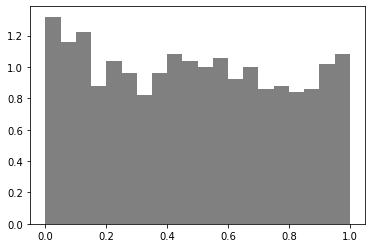

偽陽性率:  0.066
CPU times: user 1min 21s, sys: 234 ms, total: 1min 21s
Wall time: 1min 21s


In [30]:
%%time

# size=30程度だと偏る

np.random.seed(seed=0)


test_results = [
  nonparametric_bootstrap_test(
        np.random.lognormal(mean=0, sigma=1, size=30), 
        np.random.lognormal(mean=0, sigma=1, size=30), 
      )
  for _ in range(1000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  


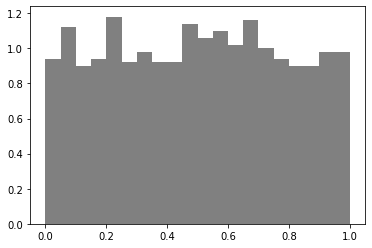

偽陽性率:  0.047
CPU times: user 1min 41s, sys: 93.8 ms, total: 1min 41s
Wall time: 1min 42s


In [31]:
%%time

# size=1000であれば偏りは抑制できる

np.random.seed(seed=0)


test_results = [
  nonparametric_bootstrap_test(
        np.random.lognormal(mean=0, sigma=1, size=300), 
        np.random.lognormal(mean=0, sigma=1, size=300), 
      )
  for _ in range(1000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  

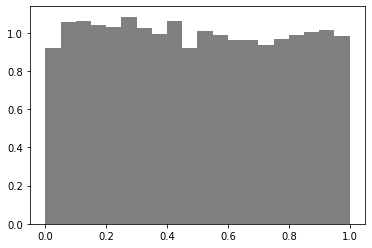

偽陽性率:  0.0459


In [32]:
# ただしsize=1000ならt検定でもかなり偏りは抑制される

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
        np.random.lognormal(mean=0, sigma=1, size=300), 
        np.random.lognormal(mean=0, sigma=1, size=300), 
        equal_var=False
      ).pvalue
  for _ in range(10000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))
  

# 4. 独立同分布の仮定
- 基本的にはミクロ平均マクロ平均で見直すべき
- ただしミクロ平均での検定を行う場合はデルタ法やブートストラップという方法もある。

## 4.2 独立同分布でないデータでt検定を行うと

In [33]:
# それぞれのサンプルから複数回測定する、という実験を考える
# それぞれのサンプルに潜在的な測定の期待値が存在し、実際の測定値はその値を中心とする正規分布からサンプリングされる、というシミュレーションをする

# 特に断りがない限り、sample_sizeは10個とし、測定回数の期待値は3回とする
def not_iid_sampling(loc, scale=1,  sample_size=10, measurement_size_binomial_n=30, measurement_size_p=0.1):
  # 個体ごとの期待値は正規分布から行う
  samples_latent_avg = np.random.normal(loc=loc, scale=scale, size=sample_size)
  # 個体ごとの測定回数は二項分布から決める
  # なお最低1回計測するため1を足している
  samples_measurement_size = np.random.binomial(n=measurement_size_binomial_n, p=measurement_size_p, size=sample_size)+1
  # 上記に従ってサンプリングを行う
  apparent_samples = [np.random.normal(loc=avg, scale=scale, size=size) for avg, size in zip(samples_latent_avg, samples_measurement_size)]

  return apparent_samples


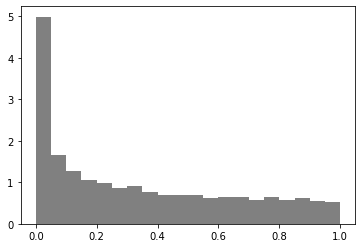

偽陽性率:  0.2497


In [34]:

# 独立同分布の仮定が満たされない場合に
# もし各測定値を単純なサンプルとみなしてt検定をすると

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      list(itertools.chain.from_iterable(not_iid_sampling(5))),
      list(itertools.chain.from_iterable(not_iid_sampling(5))),
      equal_var=False
      ).pvalue
  for _ in range(10000)
]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))

## 4.3 ミクロ平均がダメならマクロ平均を使えばいいじゃない

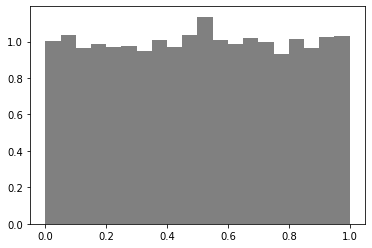

偽陽性率:  0.0501


In [35]:


# ユーザごとに平均を取る
# マクロ平均となる。

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      [np.mean(sample) for sample in not_iid_sampling(5)],
      [np.mean(sample) for sample in not_iid_sampling(5)],
      equal_var=False
      ).pvalue
  for _ in range(10000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))

In [36]:
# ユーザごと集計の検出力を見てみる

np.random.seed(seed=0)


test_results = [
  scipy.stats.ttest_ind(
      [np.mean(sample) for sample in not_iid_sampling(5)],
      [np.mean(sample) for sample in not_iid_sampling(4)],
      equal_var=False
      ).pvalue
  for _ in range(10000)
  ]

print("検出力: ", len([p for p in test_results if p < 0.05]) / len(test_results))

検出力:  0.4542


## 4.4 デルタ法による標準偏差の推定


In [37]:

# 統計量からt検定を行う関数

@dataclass
class Stats:
  mean: float
  stderr: float
  n: int

# t検定を統計量から行う
# 自由度はstudentのt検定の自由度を踏襲しているが本当はwelchのt自由度を使う必要がある
# 実際にはp値への影響はほとんどない
def ttest_from_stats(stats_a: Stats, stats_b: Stats):
  signal_noize = abs(stats_a.mean - stats_b.mean) / np.sqrt(stats_a.stderr ** 2 + stats_b.stderr ** 2)
  p_value = scipy.stats.t.sf(x=signal_noize, df=stats_a.n+stats_b.n-2) * 2
  return p_value


In [38]:
# デルタ法


def delta_var(sums, sizes):
  return ((np.var(sums, ddof=1) / np.mean(sizes)**2) 
              + (np.var(sizes, ddof=1) * np.mean(sums)**2 / np.mean(sizes)**4) 
              - 2 * (np.mean(sums) / np.mean(sizes)**3 * np.cov(sums, sizes))[0,1])


def delta_stats(samples) -> Stats:
  mean = np.mean(list(itertools.chain.from_iterable(samples)))
  var = delta_var([np.sum(s) for s in samples], [len(s) for s in samples])
  n = len(samples)
  stderr = np.sqrt(var / n)
  return Stats(mean=mean, stderr=stderr, n=n)


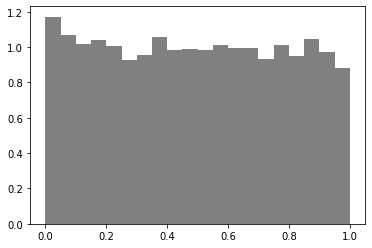

偽陽性率:  0.0586


In [39]:

# 近似している分、若干偽陽性が高くなる場合がある

np.random.seed(seed=0)


test_results = [
  ttest_from_stats(
        delta_stats(not_iid_sampling(5)), 
        delta_stats(not_iid_sampling(5))
      )
  for _ in range(10000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))

In [40]:
# デルタ法の検出力
# ミクロ平均は外れ値に弱いので注意


np.random.seed(seed=0)


test_results = [
  ttest_from_stats(
        delta_stats(not_iid_sampling(5)), 
        delta_stats(not_iid_sampling(4))
      )
  for _ in range(10000)
  ]
  
print("検出力: ", len([p for p in test_results if p < 0.05]) / len(test_results))


検出力:  0.4535


## 4.5 ブートストラップ標本統計値を用いたt検定

In [41]:

 # ブートストラップによる経験分布の平均と分散を採用する。
# ブートストラップのサンプルは独立同分布のものを採用する。今回のケースでは各測定ではなく各サンプルに対してランダムサンプリングを行う

# どうしても母集団でなく標本集団から抽出しているので、片よりは生じてしまう。ddof=1でも解決はしない
# こういう傾向があることを踏まえ、実験的にどの程度偏るかを把握して、その分p値は計算値より大きめに見る必要はある

# np.random.choiceは復元抽出
def bootstrap_micro_average(samples):
  bootstrap_sample = np.random.choice(samples, size=len(samples))
  return np.mean(list(itertools.chain.from_iterable(bootstrap_sample)))


# bootstrapサンプリング回数は50回とする
# bootstrapのサンプルで出した分散はサンプル全体の平均値の分散＝標準誤差であるため、nで割る必要はない
# 自由度はnとする
def bootstrap_stats(samples, bootstrap_sampling_size=100) -> Stats:
  bootstrap_micro_averages = [bootstrap_micro_average(samples) for _ in range(bootstrap_sampling_size)]
  bootstrap_mean = np.mean(bootstrap_micro_averages)
  bootstrap_stderr = np.sqrt(np.var(bootstrap_micro_averages, ddof=1))
  bootstrap_n = len(samples)
  return Stats(mean=bootstrap_mean, stderr=bootstrap_stderr, n=bootstrap_n)



/tmp/ipykernel_21025/3941351521.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bootstrap_sample = np.random.choice(samples, size=len(samples))


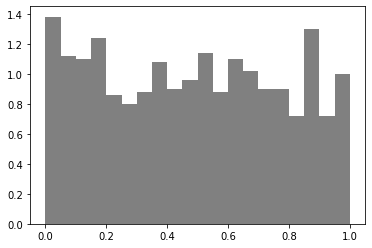

偽陽性率:  0.069
CPU times: user 8.03 s, sys: 15.6 ms, total: 8.05 s
Wall time: 8.05 s


In [42]:
%%time

np.random.seed(seed=0)


test_results = [
  ttest_from_stats(
        bootstrap_stats(not_iid_sampling(5)), 
        bootstrap_stats(not_iid_sampling(5))
      )
  for _ in range(1000)
  ]

plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))

/tmp/ipykernel_21025/3941351521.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bootstrap_sample = np.random.choice(samples, size=len(samples))


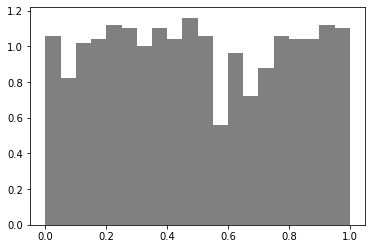

偽陽性率:  0.053


In [43]:
# サンプルサイズが多ければブートストラップ検定の結果は安定する

np.random.seed(seed=0)


test_results = [
  ttest_from_stats(
        bootstrap_stats(not_iid_sampling(5, sample_size=100)), 
        bootstrap_stats(not_iid_sampling(5, sample_size=100))
      )
  for _ in range(1000)
  ]
  
plt.hist(test_results, range=(0,1), bins=20, density=True, color="gray")
plt.show()

print("偽陽性率: ", len([p for p in test_results if p < 0.05]) / len(test_results))

In [44]:
# 検出力
# 偽陽性率が高い設定のため、検出力も参考値となる

np.random.seed(seed=0)


test_results = [
  ttest_from_stats(
        bootstrap_stats(not_iid_sampling(5)), 
        bootstrap_stats(not_iid_sampling(4))
      )
  for _ in range(1000)
  ]

print("検出力: ", len([p for p in test_results if p < 0.05]) / len(test_results))

/tmp/ipykernel_21025/3941351521.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bootstrap_sample = np.random.choice(samples, size=len(samples))


検出力:  0.473


## 4.6 Q. ミクロ平均は正規分布か？

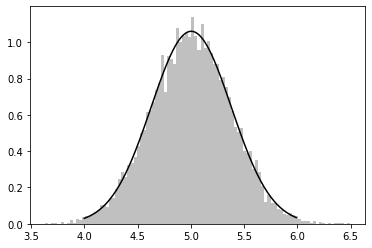

In [45]:
# デルタ法で導くミクロ平均は正規分布なのか？
# 本設定ではいい感じに近似できた

np.random.seed(seed=0)


delta_micro_avgs = [delta_stats(not_iid_sampling(5)).mean for _ in range(10000)]

plt.hist(delta_micro_avgs, bins=100, density=True, color="silver")

delta_micro_avgs_mean = np.mean(delta_micro_avgs)
delta_micro_avgs_std = np.std(delta_micro_avgs)

X = np.arange(4,6,0.01)
Y = scipy.stats.norm.pdf(X, delta_micro_avgs_mean, delta_micro_avgs_std)
plt.plot(X, Y, color="black")

plt.show()

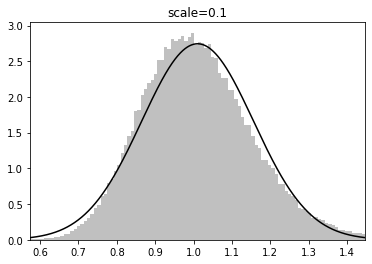

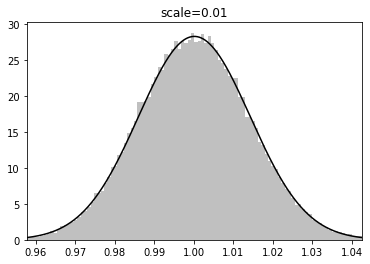

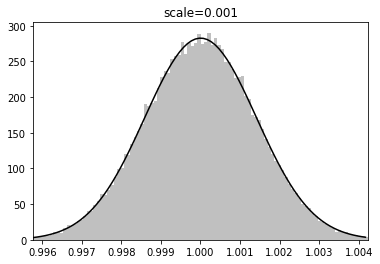

In [46]:
# ケースによっては近似できない場合もある。
# こういった確認も含めてAAテストが大事

for scl in [0.1, 0.01, 0.001]:
  np.random.seed(seed=0)
  
  a = np.random.normal(loc=1, scale=scl, size  = 100000)
  b = np.random.normal(loc=1, scale=scl, size  = 100000)
  delta_micro_avgs = b/a

  delta_micro_avgs_mean = np.mean(delta_micro_avgs)
  delta_micro_avgs_std = np.std(delta_micro_avgs)  

  plt.hist(delta_micro_avgs, bins=100, range=(delta_micro_avgs_mean - delta_micro_avgs_std*3, delta_micro_avgs_mean + delta_micro_avgs_std*3), 
           density=True, color="silver")
  

  X = np.arange(delta_micro_avgs_mean - delta_micro_avgs_std*3, delta_micro_avgs_mean + delta_micro_avgs_std*3, 0.0001)
  Y = scipy.stats.norm.pdf(X, delta_micro_avgs_mean, delta_micro_avgs_std)
  plt.plot(X, Y, color="black")
    
  plt.xlim([delta_micro_avgs_mean - delta_micro_avgs_std*3,delta_micro_avgs_mean + delta_micro_avgs_std*3])
  plt.title(f"scale={scl}")
  plt.show()

# Appendix
- 実験で明示的な結果が出ず、本編採用をボツにした検証

### マクロ平均とミクロ平均でみているものは同じか？
→ 実験的にはあまり結論を付けられなさそう

In [47]:
def micro_avg(samples):
  return np.mean(list(itertools.chain.from_iterable(samples)))

def macro_avg(samples):
  return np.mean([np.mean(s) for s in samples])

samples = not_iid_sampling(1, sample_size=100000)

print(micro_avg(samples), macro_avg(samples))
  

0.9983421725365537 0.999201307188801


### ブートストラップ中央値検定

In [48]:
%%time

# もう一つのノンパラメトリック手法であるブートストラップ中央値検定を試す
# が、何らかの偏りでうまく行かなかった...
# このセルは没かも

def bootstrap_median_delta(samples_a, samples_b):
  bootstrap_sample_a = np.random.choice(samples_a, k=len(samples_a))
  bootstrap_sample_b = np.random.choice(samples_b, k=len(samples_b))
  return  np.median(bootstrap_sample_a) - np.median(bootstrap_sample_b)


def bootstrap_median_test(samples_a, samples_b, bootstrap_sample_size=300):
  bootstrap_deltas = [bootstrap_median_delta(samples_a, samples_b) for _ in range(bootstrap_sample_size)]
  bootstrap_deltas_win = len([d for d in bootstrap_deltas if d>0])
  bootstrap_deltas_lose = len([d for d in bootstrap_deltas if d<0])
  # 両側検定でのp値は頻度が小さい側の割合*2にあたる
  p_value = min(bootstrap_deltas_win, bootstrap_deltas_lose) / (bootstrap_deltas_win + bootstrap_deltas_lose) * 2
  return p_value

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs
